## The scenario:

You are a business intelligence manager at a fast moving startup that deals with flowers. Iris Mania is sweeping the world and certain species fetch upwards of 50,000 dollars AU for a single flower!

A new iris has just been delivered. It’s species is not known and the resident florist is
on holidays.

The business has a sample data set with typical measures for the
following three species for iris flower.

Our mystery flower has the following characteristics: <br><br>
Sepal length = 4.2 cm <br>
Sepal width =  4.1 cm <br>
Petal length = 1.3 cm <br>
Petal width =  0.25 cm<br>


Which species is it likely to be?

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read in data, check for missing values
df = pd.read_csv('./iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
#Check species names and number of species samples collected
print(df['species'].unique())
print(df['species'].value_counts())

['setosa' 'versicolor' 'virginica']
versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


In [4]:
#Explore average values of sepal + petal characteristics
groups = df.groupby(by = ['species'])
groups.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Sepal length = 4.2 cm <br>
Sepal width =  4.1 cm <br>
Petal length = 1.3 cm <br>
Petal width =  0.25 cm<br>

### Lets use the first iris as our unidentified flower

In [128]:
s_length, s_width, p_length, p_width, v = df.loc[0]

In [129]:
print('s_length',s_length)
print('s_width',s_width)
print('p_length', p_length)
print('p_width',p_width)
print('variety', v)

s_length 5.1
s_width 3.5
p_length 1.4
p_width 0.2
variety setosa


Unknown species sepal length = 5.1 cm


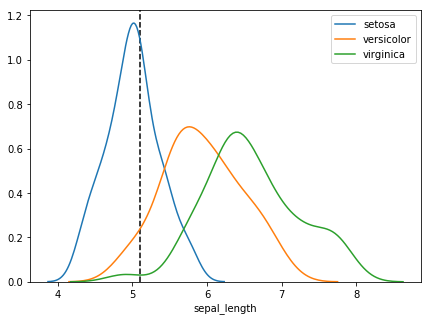

In [66]:
#Frequeny plot of characteristics - First sepal length:
ax, fig = plt.subplots(figsize = [7, 5])
for species in df['species'].unique():
    sns.distplot(df[df['species'] == species]['sepal_length'], hist = False, label = species);
plt.legend();

ymax = fig.get_ylim()[1]

plt.vlines(x = s_length, ymin = 0, ymax = ymax, linestyles = 'dashed', colors = 'k');

print('Unknown species sepal length = {} cm'.format(s_length))

Unknown species sepal width = 3.5 cm


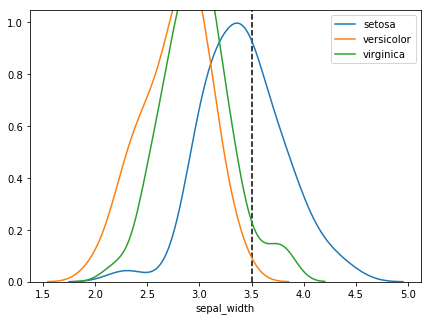

In [110]:
ax, fig = plt.subplots(figsize = [7,5])
for species in df['species'].unique():
    sns.distplot(df[df['species'] == species]['sepal_width'], hist = False, label = species)
plt.legend()

ymax = fig.get_ylim()[1]

plt.vlines(x = s_width, ymin = 0, ymax = ymax , linestyles = 'dashed', colors = 'k');

print('Unknown species sepal width = {} cm'.format(s_width))

Unknown species petal length = 1.4 cm


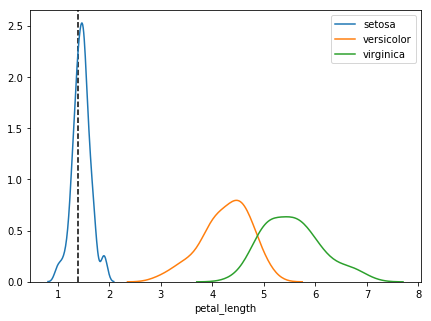

In [111]:
ax, fig = plt.subplots(figsize = [7,5])
for species in df['species'].unique():
    sns.distplot(df[df['species'] == species]['petal_length'], hist = False, label = species)
plt.legend();

ymax = fig.get_ylim()[1]

plt.vlines(x = p_length, ymin = 0, ymax = ymax, linestyles = 'dashed', colors = 'k');

print('Unknown species petal length = {} cm'.format(p_length))

Unknown species petal width = 0.2 cm


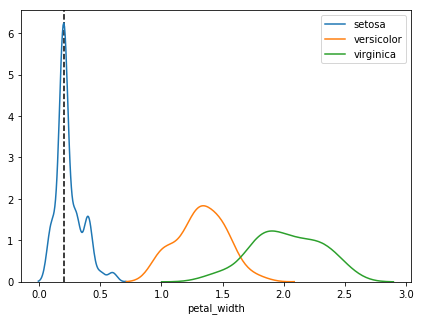

In [112]:
ax, fig = plt.subplots(figsize = [7,5])
for species in df['species'].unique():
    sns.distplot(df[df['species'] == species]['petal_width'], hist = False, label = species)
plt.legend()

ymax = fig.get_ylim()[1]

plt.vlines(x = p_width, ymin = 0, ymax = ymax, linestyles = 'dashed', colors = 'k');

print('Unknown species petal width = {} cm'.format(p_width))

## Given our data, which species is the unknown iris likely to be?

In [14]:
df.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [117]:
# y is the targets
unknown_X = df.iloc[0,:-1]
unknown_y = df.iloc[0,-1]
X = df.iloc[1:,:-1]
y = df.iloc[1:,-1]

In [119]:
unknown_X

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: object

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
knn.predict(unknown_X.values.reshape(1,-1))

array(['setosa'], dtype=object)